In [140]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from random import randint
import joblib

In [ ]:
x_train = pd.read_csv("ScaledTrainingData.csv")
x_test = pd.read_csv("ScaledTestData.csv")
y_train = pd.read_csv("UnscaledTrainigData.csv").values.ravel()
y_test = pd.read_csv("UnscaledTestData.csv").values.ravel()

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(x_train, y_train)
joblib.dump(model, "SavePointModel.pkl")

RandomForestRegressor(n_estimators=500, random_state=0)

In [143]:
y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 140.83
RMSE: 233.47
R² Score: 0.87


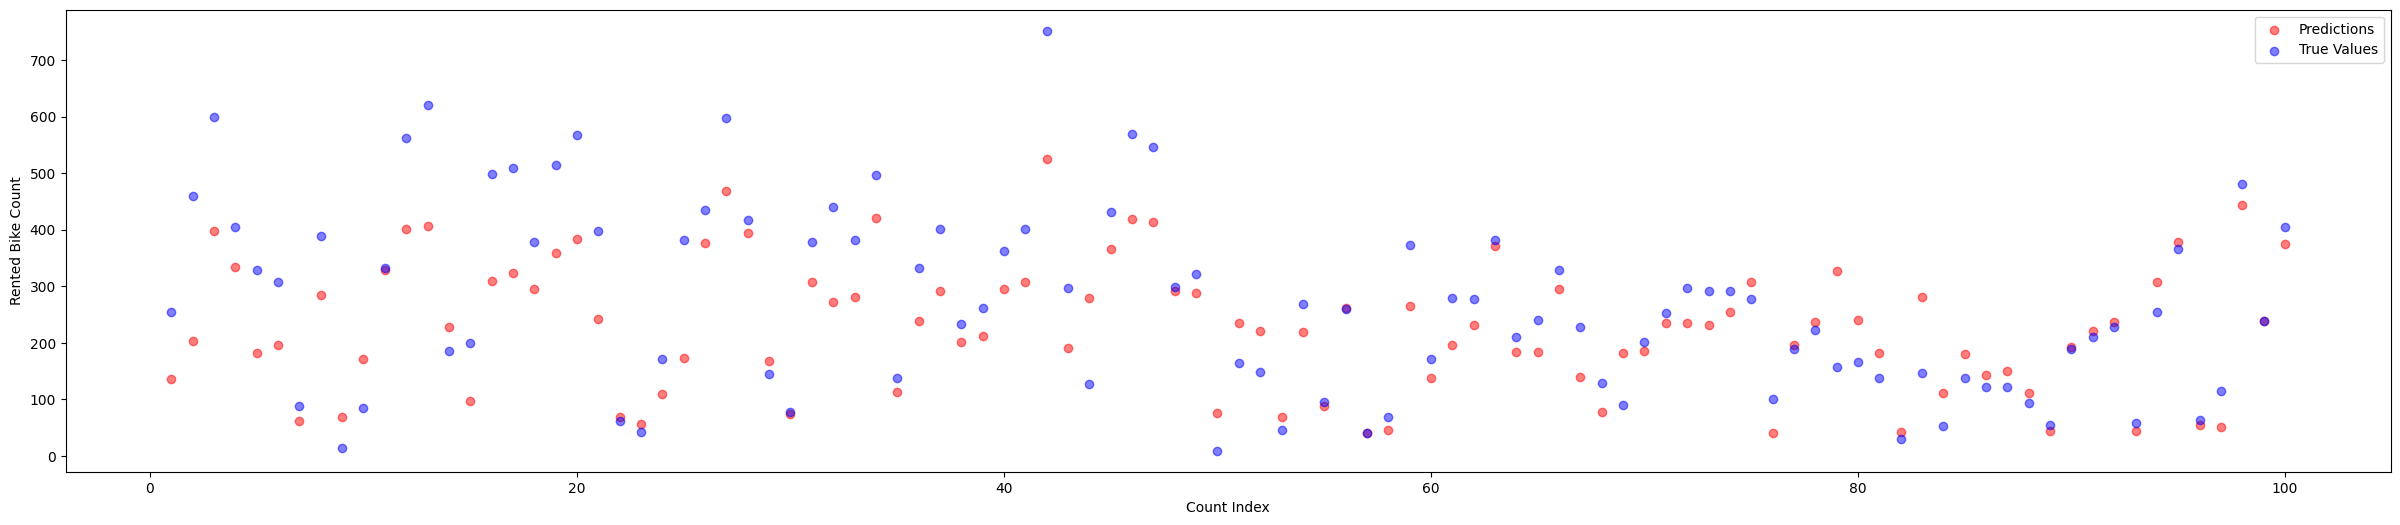

In [144]:
fig, ax = plt.subplots(figsize=(30, 6))
a = ax
test_label = pd.read_csv("UnscaledTestData.csv")
ax.scatter(range(1, 101), y_pred[:100], color='red', alpha=0.5, label='Predictions')
ax.scatter(range(1, 101), test_label.iloc[:100, 0], color='blue', alpha=0.5, label='True Values')
ax.set_xlabel('Count Index')
ax.set_ylabel('Rented Bike Count')
ax.legend()
plt.show()

1752


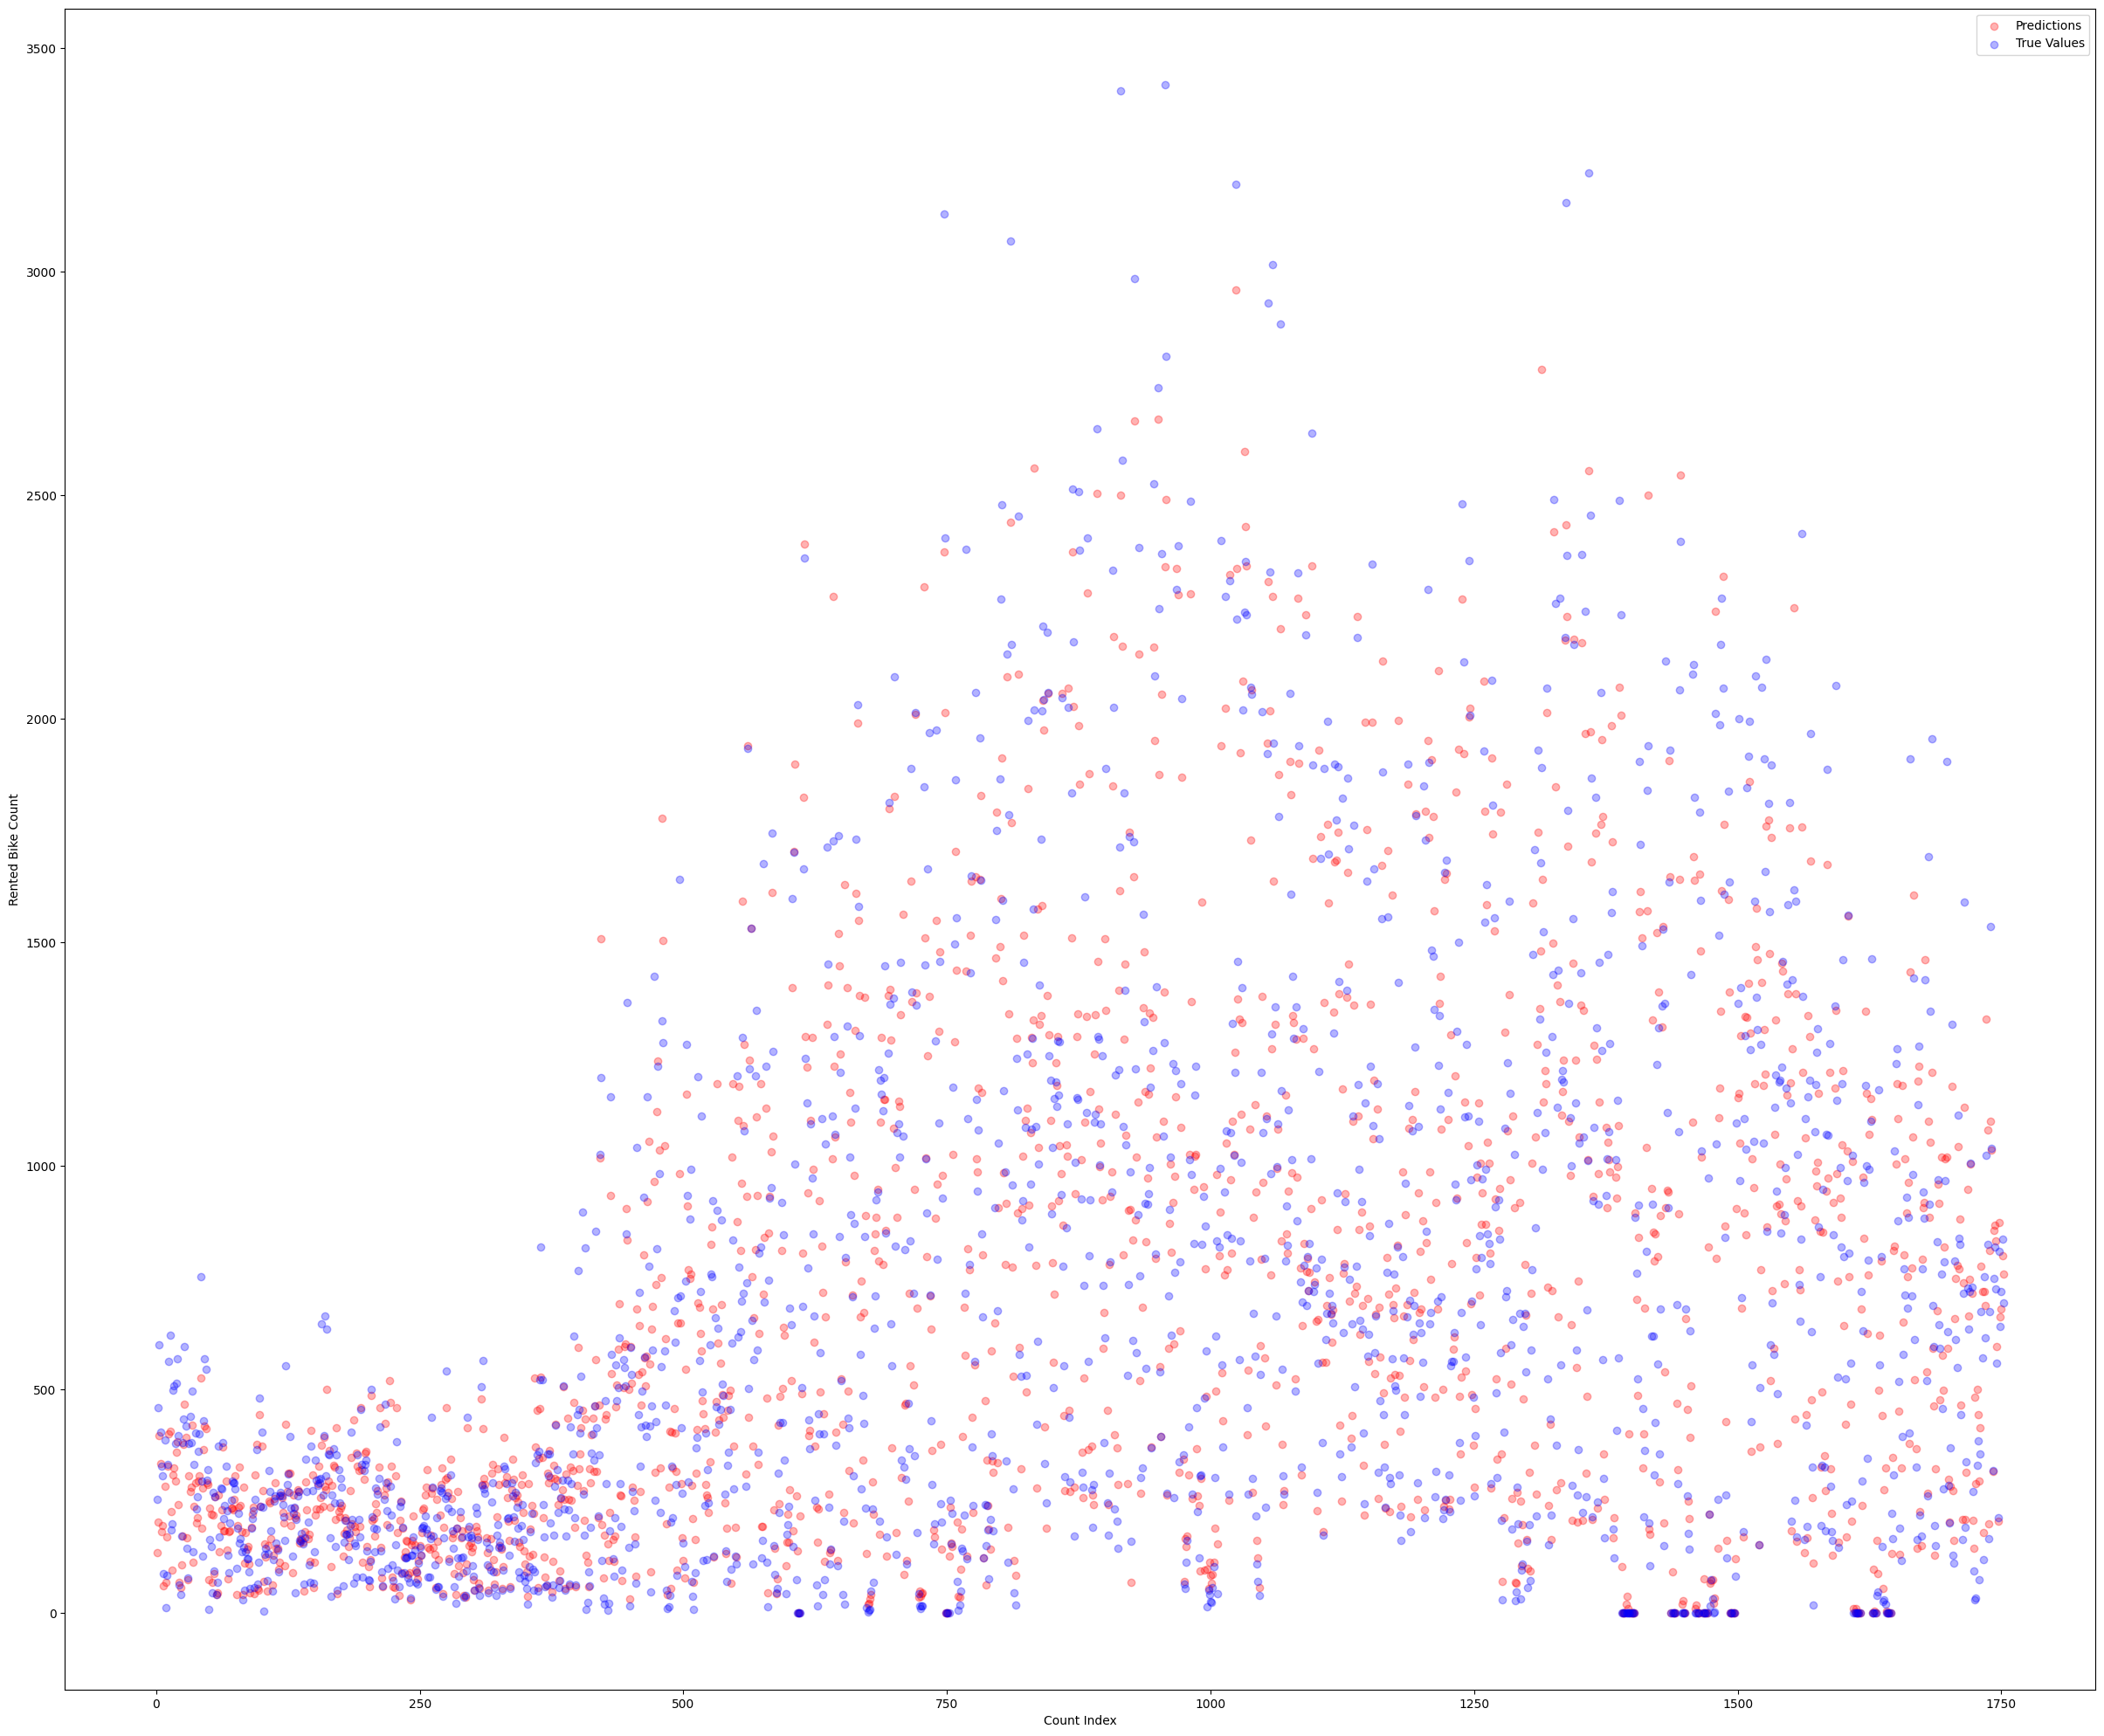

In [145]:
fig, ax = plt.subplots(figsize=(30, 25))
a = ax
ax.scatter(range(1, 1753), y_pred, color='red', alpha=0.3, label='Predictions')
ax.scatter(range(1, 1753), test_label, color='blue', alpha=0.3, label='True Values')
print(len(test_label))
ax.set_xlabel('Count Index')
ax.set_ylabel('Rented Bike Count')
ax.legend()
plt.show()

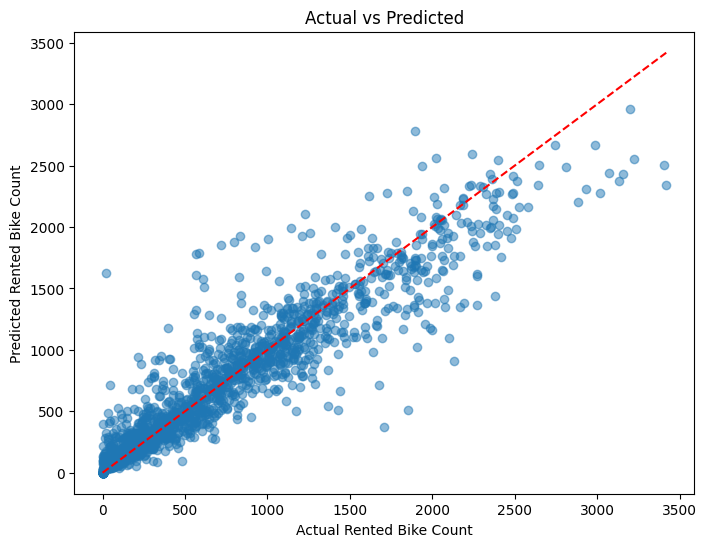

In [146]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Predicted Rented Bike Count")
plt.title("Actual vs Predicted")
plt.show()


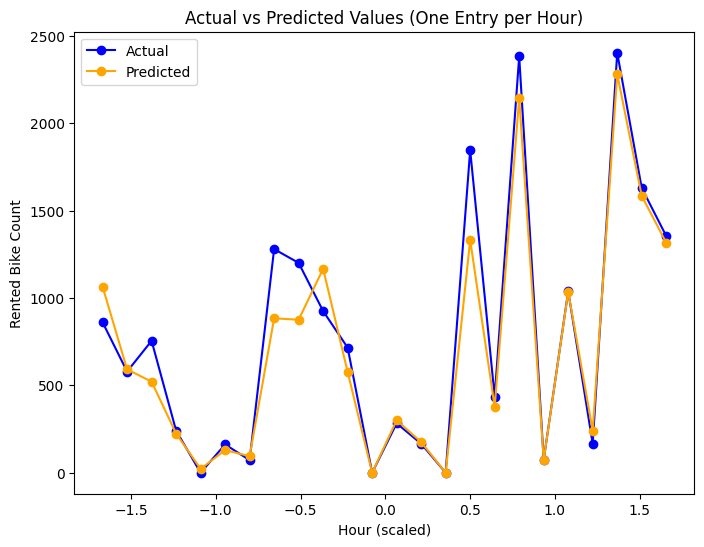

In [147]:
hours = x_test['Hour']

unique_hour_indices = hours.groupby(hours).apply(lambda x: x.index[randint(0,len(x)-1)]).values

plt.figure(figsize=(8, 6))
plt.plot(hours.iloc[unique_hour_indices], y_test[unique_hour_indices], color='blue', marker='o', label='Actual')
plt.plot(hours.iloc[unique_hour_indices], y_pred[unique_hour_indices], color='orange', marker='o', label='Predicted')
plt.xlabel("Hour (scaled)")
plt.ylabel("Rented Bike Count")
plt.title("Actual vs Predicted Values (One Entry per Hour)")
plt.legend()
plt.show()